In [1]:
import pandas as pd
import seaborn as sns

In [2]:
class Dynamics():
    """
        15/04/23
    """
    def __init__(self):
        path = r'../../../data/2019-Nov.csv'
        self.df = pd.read_csv(
            path,
            sep=',',
            decimal='.',
            date_parser=['Date'],
        )

    def dataframe(self):
        df = self.df.head()
        display(df)

    def tipos(self):
        df = self.df.dtypes
        display(df)

    def estatística_dos_dados(self):
        df = self.df.describe().round(decimals=2)
        display(df)

    def tamanho_do_dataframe(self): 
        df = self.df.shape
        display(df)

    def verificando_valores_nulos(self):
        df = self.df.isnull().sum()
        display(df)

    def contagem_valores_de_duplicados_por_coluna(self):
        df = self.df.apply(lambda x: x.duplicated()).sum()
        display(df)

    def removendo_valores_nulos(self):
        self.df = self.df.dropna()

    def removendo_duplicatas(self):
        self.df = self.df.drop_duplicates()

    def agrupando(self):
        self.df_agrupado = (
                self.df[['user_session','event_type','product_id','event_time']]
                .groupby('user_session')
                .count()
                .reset_index()
            )
        
        display(self.df_agrupado)

    def transformando_a_coluna_event_time_para_datetime(self):
        self.df['event_time'] = pd.to_datetime(
            arg=self.df['event_time'],
            format='%Y-%m-%d %H:%M:%S UTC'
        )

    def calculando_quartis(self):
        percentiles = [.01, .10, .25, .50, .75, .99]
        df = self.df.describe(percentiles=percentiles).round(decimals=2)
        display(df)

    def calculando_quartis_entre_75_a_25(self):
        df = self.df
        q1 = df['price'].quantile(0.25)
        q3 = df['price'].quantile(0.75)
        iqr = q3 - q1

        df['price'] = df['price'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)
        sns.boxplot(
            x=df['price']
        )

    def calcular_lower_bound_de_25(self):
        pass

    def calcular_upper_bound_de_75(self):
        pass

    def comparar_valores_com_o_descri_percentiles_de_todos_os_valores_calculados(self):
        pass

if __name__ == '__main__':
    dynamics = Dynamics()

In [3]:
dynamics.dataframe()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [4]:
dynamics.tipos()

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [5]:
dynamics.estatística_dos_dados()

,product_id,category_id,price,user_id
count,4635837.00,4.635837e+06,4635837.00,4.635837e+06
mean,5481406.23,1.550049e+18,8.12,5.068070e+08
std,1305581.80,1.642371e+17,18.79,8.504375e+07
min,3752.00,1.487580e+18,-79.37,1.120748e+06
25%,5723529.00,1.487580e+18,1.94,4.698573e+08
50%,5810145.00,1.487580e+18,3.97,5.421750e+08
75%,5856186.00,1.487580e+18,6.35,5.680491e+08
max,5909246.00,2.195085e+18,327.78,5.799699e+08


In [6]:
dynamics.tamanho_do_dataframe()

(4635837, 9)

In [7]:
dynamics.verificando_valores_nulos()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4560089
brand            1986029
price                  0
user_id                0
user_session         813
dtype: int64

In [8]:
dynamics.contagem_valores_de_duplicados_por_coluna() 

event_time       2825102
event_type       4635833
product_id       4592418
category_id      4635346
category_code    4635826
brand            4635597
price            4633299
user_id          4267605
user_session     3693814
dtype: int64

In [9]:
dynamics.removendo_valores_nulos()

In [10]:
dynamics.removendo_duplicatas()

In [11]:
dynamics.tamanho_do_dataframe()

(54865, 9)

In [12]:
dynamics.agrupando()

,user_session,event_type,product_id,event_time
0,00001bc6-1e04-4861-be5d-1bc73929c21a,1,1,1
1,0000d72e-be5f-4a03-9f17-6ac81584f177,1,1,1
2,00026821-ef52-4ca1-a963-c4bd31851bed,1,1,1
3,00086db9-7892-406d-b899-98399fd80cbe,6,6,6
4,000f23da-9d0b-4ae6-85e8-2c477f38d94b,1,1,1
...,...,...,...,...
26565,ffeb9168-6d9c-40e4-84c9-6ac6c1908c3d,1,1,1
26566,ffeeb6bc-3674-42a3-9f4e-c74486e834de,2,2,2
26567,fff32e24-e6c9-4aca-a600-ba16c33c5c45,17,17,17
26568,fff6d5a8-c813-48d2-a9e2-49db9d500bfa,1,1,1


In [13]:
dynamics.transformando_a_coluna_event_time_para_datetime()

In [14]:
dynamics.tipos()

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [15]:
dynamics.calculando_quartis()

,product_id,category_id,price,user_id
count,54865.00,5.486500e+04,54865.00,5.486500e+04
mean,5522523.58,1.614899e+18,37.37,5.111918e+08
std,1299684.33,2.469364e+17,35.67,8.289645e+07
min,5395.00,1.487580e+18,0.94,2.055497e+07
1%,5395.00,1.487580e+18,1.27,2.330105e+08
10%,5732026.00,1.487580e+18,1.98,3.969008e+08
25%,5767493.00,1.487580e+18,4.16,4.766110e+08
50%,5854573.00,1.487580e+18,24.44,5.482052e+08
75%,5868559.00,1.487580e+18,62.70,5.688303e+08
99%,5901987.00,2.193075e+18,150.79,5.791884e+08


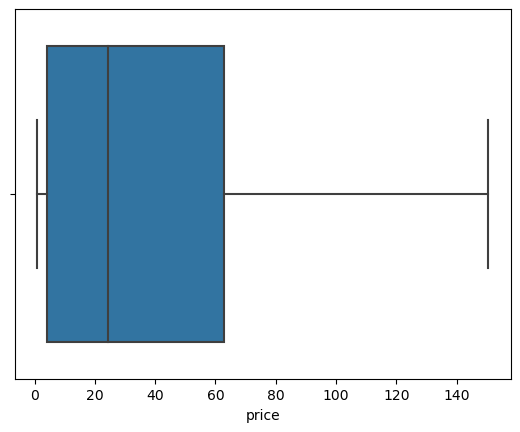

In [16]:
dynamics.calculando_quartis_entre_75_a_25()